In [3]:
# print("Hello OpenCV")
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

print(cv2.__version__)

4.11.0


In [4]:
# folder = "./fig/dog.bmp"
folder = 'fig'
Path(folder, "dog.bmp")

img = cv2.imread(Path(folder, 'dog.bmp'), cv2.IMREAD_REDUCED_COLOR_2) # BGR
print("Image type =", type(img))
print("Image shape =", img.shape)
print("Image dtype =", img.dtype)

if img is None:
    print("image read failed")
    sys.exit()

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

Image type = <class 'numpy.ndarray'>
Image shape = (240, 320, 3)
Image dtype = uint8


In [3]:
img = cv2.imread(Path(folder, 'rose.jpg'), cv2.IMREAD_COLOR) # BGR

if img is None:
    print("image read failed")
    sys.exit()

h, w = img.shape[:2]
print(f"Image width x height = {w} x {h}")

cv2.namedWindow("rose")
cv2.imshow('rose', img)

cv2.waitKey()
cv2.destroyAllWindows()

Image width x height = 600 x 461


In [24]:
img = cv2.imread(Path(folder, "dog.bmp"), cv2.IMREAD_COLOR)

if img is None:
    print("image read failed")
    sys.exit()

cv2.namedWindow('dog', cv2.WINDOW_AUTOSIZE)
cv2.imshow("dog", img) # ndarray

# 키보드 입략
while True:
    if cv2.waitKey() == ord("q"):
        break

cv2.destroyAllWindows()

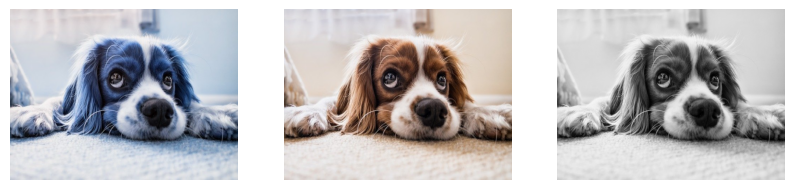

In [42]:
## matplotlib

img = cv2.imread(Path(folder, 'dog.bmp'), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Color space change
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

if img_rgb is None:
    print('image read failed')
    sys.exit()

img_lists = [img, img_rgb, img_gray]
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

for i, img in enumerate(img_lists):
    if i == 2:
        axs[i].imshow(img, cmap='gray')
    else:
        axs[i].imshow(img)
    axs[i].axis('off')

plt.show()


## matplotlib

# plt.figure(figsize=(10, 3))
# plt.subplot(131), plt.imshow(img), plt.axis('off'), plt.title('BGR')
# plt.subplot(132), plt.imshow(img_rgb), plt.axis('off'), plt.title('RGB')
# plt.subplot(133), plt.imshow(img_gray, cmap='gray'), plt.axis('off'), plt.title('GRAY')
# plt.axis('off')
# plt.show()


## OpenCV

# cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
# cv2.imshow('image', img)
# while True:
#     if cv2.waitKey() == ord('q'):
#         break
# cv2.destroyAllWindows()

### 디렉토리 내 영상 플레이

In [61]:
import os

img_list = os.listdir(Path(folder, 'images'))
# display(img_list)

img_files = []
for i in img_list:
    img_dir = Path(folder, 'images', i)
    img_files.append(img_dir)

cv2.namedWindow("Scene", cv2.WINDOW_NORMAL)
cv2.setWindowProperty('Scene', cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(img_files[idx], cv2.IMREAD_COLOR)

    if img is None:
        idx += 1
        continue
    
    cv2.imshow("Scene", img)

    if cv2.waitKey(3000) == 27:
        break

    idx += 1

    if idx >= len(img_files):
        idx = 0


cv2.destroyAllWindows()

### 영상의 픽셀값 참조

In [18]:
img = cv2.imread(Path(folder, 'dog.bmp'))

if img is None:
    print("image read failed")
    sys.exit()

h, w = img.shape[:2]
print(img[h//2, w//2]) # adarray index and slicing

img[150:250, 250:500] = (0, 0, 0)

cv2.namedWindow('dog', cv2.WINDOW_AUTOSIZE)
cv2.imshow('dog', img)

while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

[ 0 14 40]


### Canvas

In [19]:
img1 = np.ones((800, 400, 3), dtype=np.uint8)
img2 = np.ones((800, 400, 3), dtype=np.uint8)*255
img3 = np.ones((400, 800), dtype=np.uint8)
img4 = np.full((800, 400, 3), (23, 145, 88), dtype=np.uint8)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)

cv2.waitKey()
cv2.destroyAllWindows()

### 영상 복사 (memory copy)

In [ ]:
img = cv2.imread(Path(folder, 'rose.jpg'))

if img is None:
    print("Image read failed")
    sys.exit()

img2 = img        # shallow copy
img3 = img.copy() # deep copy

## img 수정
img2[100:150, 200:300] = (255, 0, 0)

cv2.namedWindow('rose', cv2.WINDOW_AUTOSIZE)
cv2.imshow('rose', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

### 영상 합성

In [30]:
img = cv2.imread(Path(folder, "dog.bmp"))

if img is None:
    print("image read failed")
    sys.exit()

dog_eye = img[150:250, 250:500]
cv2.circle(dog_eye, (50, 50), 30, (0, 0, 255), 5, cv2.LINE_AA)

cv2.imshow('dog', img)
cv2.imshow('dog_eye', dog_eye)

while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

In [37]:
img = cv2.imread(Path(folder, "rudolf.png"), cv2.IMREAD_REDUCED_COLOR_2)

if img is None:
    print('Image read failed')
    sys.exit()

h, w = img.shape[:2]

img2 = img[h//2-100:h//2+100, w//2-100:w//2+100]
img3 = img[h//2-100:h//2+100, w//2-100:w//2+100].copy()

cv2.circle(img2, (img2.shape[1]//2, img2.shape[0]//2), 30, (255, 0, 255), -1)

cv2.imshow("img", img)
cv2.imshow("img2", img2)
cv2.imshow("img3", img3)

# a, b, c, d = cv2.selectROI(img)

while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

In [43]:
src = cv2.imread(Path(folder, "airplane.bmp"), cv2.IMREAD_COLOR)
mask = cv2.imread(Path(folder, "mask_plane.bmp"), cv2.IMREAD_GRAYSCALE)
dst = cv2.imread(Path(folder, 'beach.bmp'), cv2.IMREAD_COLOR)

if src is None or mask is None or dst is None:
    print("Image read failed")
    sys.exit()

cv2.copyTo(src, mask, dst)

cv2.imshow("src", src)
cv2.imshow("mask", mask)
cv2.imshow("dst", dst)

while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

In [53]:
src = cv2.imread(Path(folder, "airplane.bmp"))
mask = cv2.imread(Path(folder, 'mask_plane.bmp'), cv2.IMREAD_GRAYSCALE)
dst = cv2.imread(Path(folder, 'beach.bmp'))

if src is None or mask is None or dst is None:
    print("image read failed")
    sys.exit()

h, w = src.shape[:2]

dst_crop = dst[100:100+h, 800:800+w]

cv2.copyTo(src, mask, dst_crop)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.namedWindow("dst", cv2.WINDOW_NORMAL)
cv2.imshow('dst', dst)
cv2.imshow('dst_crop', dst_crop)

while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

In [59]:
src = cv2.imread(Path(folder, "sunglass.png"), cv2.IMREAD_UNCHANGED)

print(src.shape)

mask = src[..., -1]
glass = src[..., 0:-1]

cv2.imshow("mask", mask)
cv2.imshow("glass", glass)

cv2.waitKey()
cv2.destroyAllWindows()

(480, 960, 4)
